<a href="https://colab.research.google.com/github/kul-pat/Public-Machine-learning/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
df = pd.read_csv('data.csv')
df.head()

In [ ]:
df.shape

(569, 33)

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(axis=1,inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df.iloc[:,1] = labelencoder_y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

In [ ]:
df.iloc[:,1:12].corr()

In [ ]:
X = df.drop("diagnosis",axis=1)   #Feature Matrix
y = df["diagnosis"]

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((398, 31), (171, 31))

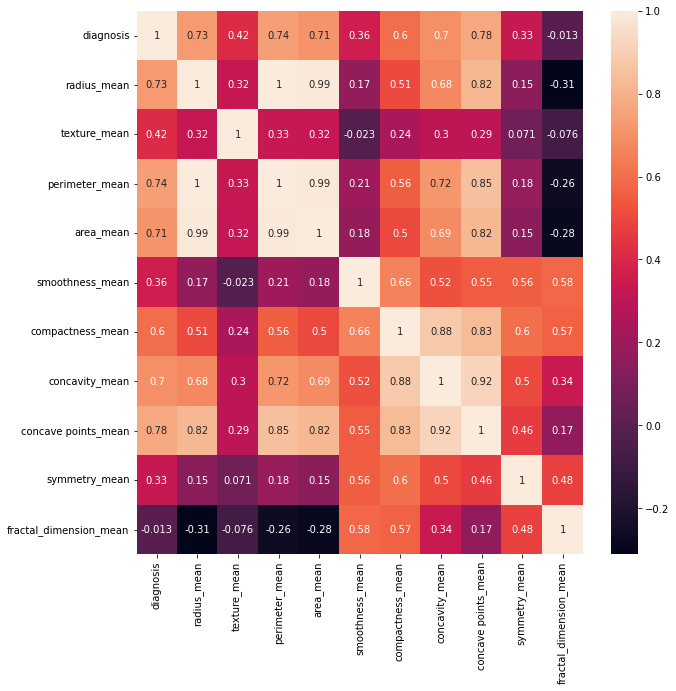

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, .7)
len(set(corr_features))

21

In [ ]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_worst'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
512,915691,13.400,20.52,0.11060,0.14690,0.2116,0.07325,0.9306,0.005414,0.01705
457,9112367,13.210,25.25,0.08791,0.05205,0.1619,0.05584,1.3500,0.005768,0.01347
439,909410,14.020,15.66,0.07966,0.05581,0.1589,0.05586,0.6549,0.004837,0.01171
298,892214,14.260,18.17,0.06576,0.05220,0.1635,0.05586,0.6690,0.003169,0.01103
37,854941,13.030,18.42,0.08983,0.03766,0.1467,0.05863,2.3420,0.004352,0.02671
...,...,...,...,...,...,...,...,...,...,...
7,84458202,13.710,20.83,0.11890,0.16450,0.2196,0.07451,1.3770,0.008805,0.01486
408,90524101,17.990,20.66,0.10360,0.13040,0.1992,0.06069,0.8733,0.007231,0.01414
523,917896,13.710,18.68,0.09916,0.10700,0.1714,0.06843,1.2490,0.006739,0.01870
361,901041,13.300,21.57,0.08582,0.06373,0.1815,0.05696,1.5390,0.005498,0.01829


In [ ]:
# scale the data (" feature sclaing")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[-0.232028  , -0.74998027, -1.09978744, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-0.23217735, -1.02821446, -0.1392617 , ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.17081111, -0.53852228, -0.29934933, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [ 6.83303935, -1.3214733 , -0.20855336, ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-0.23231516, -1.24245479, -0.23244704, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.2319212 , -0.74441558,  1.13188181, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [ ]:
#create a function for the model
def models(x_train,y_train):

  # logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(x_train,y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
  tree.fit(x_train,y_train) 
  
  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =0)
  forest.fit(x_train,y_train)

  # print the accuracy of the models
  print('[0]Logistic Regression Training Accuracy:', log.score(x_train,y_train))
  print('[1]Decision Tree Accuracy:',tree.score(x_train,y_train))
  print('[2]Random Forest Classifier:',forest.score(x_train,y_train))

  return log, tree, forest

In [ ]:
# getting all the models
model = models(X_train,y_train)
# testing a model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('model',i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  TP = cm[0][0]
  FP = cm[0][1]
  TN = cm[1][1]
  FN = cm[1][0]
  print(cm)
  print('Test accuracy=', (TP+TN)/(TP+TN+FP+FN))
  print()
  # another way to get the metrices of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print(classification_report(y_test,model[i].predict(X_test)))
    print()
    print(accuracy_score(y_test,model[i].predict(X_test)))
    print()

[0]Logistic Regression Training Accuracy: 0.9899497487437185
[1]Decision Tree Accuracy: 1.0
[2]Random Forest Classifier: 0.9949748743718593
model 0
[[103   5]
 [  2  61]]
Test accuracy= 0.9590643274853801

model 1
[[103   5]
 [  3  60]]
Test accuracy= 0.9532163742690059

model 2
[[101   7]
 [  2  61]]
Test accuracy= 0.9473684210526315

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


0.9590643274853801

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.9